# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [85]:
from pandas_datareader import data as web

import plotly.express as px
from plotly.graph_objects import Layout
from plotly import graph_objects
import yfinance as yf

import datetime as dt
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

#### 1. Carregue os dados da tarefa anterior

In [64]:
ativos = ['AAPL', 'MSFT', 'NVDA']
dt_ini = '2022-10-03'

yf_data = yf.download(ativos, start=dt_ini)
yf_data

[*********************100%***********************]  3 of 3 completed


Price                       Adj Close                               Close  \
Ticker                           AAPL        MSFT        NVDA        AAPL   
Date                                                                        
2022-10-03 00:00:00+00:00  140.888962  236.660141   12.500570  142.449997   
2022-10-04 00:00:00+00:00  144.498962  244.662170   13.154971  146.100006   
2022-10-05 00:00:00+00:00  144.795670  244.976746   13.196932  146.399994   
2022-10-06 00:00:00+00:00  143.836304  242.607574   13.118004  145.429993   
2022-10-07 00:00:00+00:00  138.554840  230.270294   12.064968  140.089996   
...                               ...         ...         ...         ...   
2024-09-30 00:00:00+00:00  233.000000  430.299988  121.440002  233.000000   
2024-10-01 00:00:00+00:00  226.210007  420.690002  117.000000  226.210007   
2024-10-02 00:00:00+00:00  226.779999  417.130005  118.849998  226.779999   
2024-10-03 00:00:00+00:00  225.669998  416.540009  122.849998  225.669998   
2024-10-04 00:00:00+00:00  226.800003  416.059998  124.919998  226.800003   

Price                                                    High              \
Ticker                           MSFT        NVDA        AAPL        MSFT   
Date                                                                        
2022-10-03 00:00:00+00:00  240.740005   12.512000  143.070007  241.610001   
2022-10-04 00:00:00+00:00  248.880005   13.167000  146.220001  250.360001   
2022-10-05 00:00:00+00:00  249.199997   13.209000  147.380005  250.580002   
2022-10-06 00:00:00+00:00  246.789993   13.130000  147.539993  250.339996   
2022-10-07 00:00:00+00:00  234.240005   12.076000  143.100006  241.320007   
...                               ...         ...         ...         ...   
2024-09-30 00:00:00+00:00  430.299988  121.440002  233.000000  430.420013   
2024-10-01 00:00:00+00:00  420.690002  117.000000  229.649994  428.480011   
2024-10-02 00:00:00+00:00  417.130005  118.849998  227.369995  422.820007   
2024-10-03 00:00:00+00:00  416.540009  122.849998  226.809998  419.549988   
2024-10-04 00:00:00+00:00  416.059998  124.919998  228.000000  419.750000   

Price                                         Low                          \
Ticker                           NVDA        AAPL        MSFT        NVDA   
Date                                                                        
2022-10-03 00:00:00+00:00   12.678000  137.690002  234.660004   12.105000   
2022-10-04 00:00:00+00:00   13.220000  144.259995  244.979996   12.879000   
2022-10-05 00:00:00+00:00   13.321000  143.009995  244.100006   12.621000   
2022-10-06 00:00:00+00:00   13.656000  145.220001  246.080002   13.103000   
2022-10-07 00:00:00+00:00   12.670000  139.449997  233.169998   12.022000   
...                               ...         ...         ...         ...   
2024-09-30 00:00:00+00:00  121.500000  229.649994  425.369995  118.150002   
2024-10-01 00:00:00+00:00  122.440002  223.740005  418.809998  115.790001   
2024-10-02 00:00:00+00:00  119.379997  223.020004  416.709991  115.139999   
2024-10-03 00:00:00+00:00  124.360001  223.320007  414.290009  120.339996   
2024-10-04 00:00:00+00:00  125.040001  224.130005  414.970001  121.830002   

Price                            Open                             Volume  \
Ticker                           AAPL        MSFT        NVDA       AAPL   
Date                                                                       
2022-10-03 00:00:00+00:00  138.210007  235.410004   12.347000  114311700   
2022-10-04 00:00:00+00:00  145.029999  245.089996   12.879000   87830100   
2022-10-05 00:00:00+00:00  144.070007  245.990005   12.911000   79471000   
2022-10-06 00:00:00+00:00  145.809998  247.929993   13.220000   68402200   
2022-10-07 00:00:00+00:00  142.539993  240.899994   12.505000   85925600   
...                               ...         ...         ...        ...   
2024-09-30 00:00:00+00:00  230.039993  428.209991  118.309998   54541900   
202

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [66]:
mediaMovel = yf_data['Adj Close'].rolling(90).mean()
mediaMovel.tail(90)

Ticker,AAPL,MSFT,NVDA
Date,,,
2024-05-29 00:00:00+00:00,178.769890,411.637383,83.455573
2024-05-30 00:00:00+00:00,178.746688,411.854818,84.020465
2024-05-31 00:00:00+00:00,178.719861,412.050945,84.573292
2024-06-03 00:00:00+00:00,178.720316,412.188769,85.169202
2024-06-04 00:00:00+00:00,178.727975,412.329348,85.778243
...,...,...,...
2024-09-30 00:00:00+00:00,216.993771,429.088758,118.669197
2024-10-01 00:00:00+00:00,217.388557,428.988143,118.914374
2024-10-02 00:00:00+00:00,217.834291,428.887012,119.081801


In [68]:
desvioPadrao = yf_data['Adj Close'].rolling(90).std()
desvioPadrao.tail(90)

Ticker,AAPL,MSFT,NVDA
Date,,,
2024-05-29 00:00:00+00:00,8.772488,9.954796,11.627826
2024-05-30 00:00:00+00:00,8.736696,9.785339,11.692655
2024-05-31 00:00:00+00:00,8.691551,9.654845,11.713698
2024-06-03 00:00:00+00:00,8.692348,9.574452,11.881924
2024-06-04 00:00:00+00:00,8.705754,9.525870,12.063862
...,...,...,...
2024-09-30 00:00:00+00:00,12.200667,17.173219,8.968567
2024-10-01 00:00:00+00:00,11.911032,17.195841,8.606734
2024-10-02 00:00:00+00:00,11.491562,17.238944,8.454261


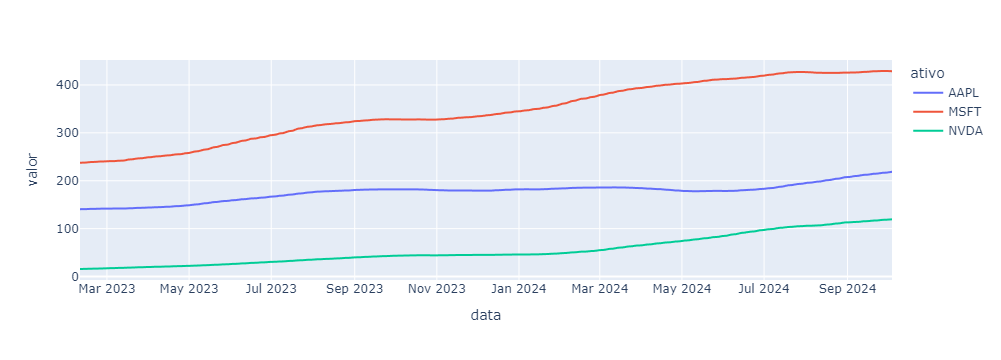

In [70]:
mediaMovelVertical = mediaMovel.stack().reset_index()
mediaMovelVertical.columns = ['data', 'ativo', 'valor']
fig = px.line(mediaMovelVertical, x='data', y='valor', color='ativo')
fig.show()

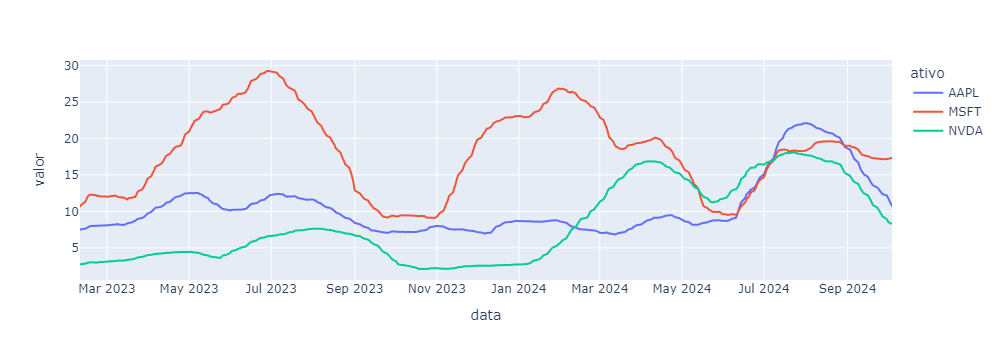

In [72]:
desvioPadraoVertical = desvioPadrao.stack().reset_index()
desvioPadraoVertical.columns = ['data', 'ativo', 'valor']
fig = px.line(desvioPadraoVertical, x='data', y='valor', color='ativo')
fig.show()

# Conclusão:

Comparando com o gráfico da atividade anterior, existe uma certa semelhança na comclusão do grafico de desvio padrão.  
Ja no grafico de média móvel, ja não conseguimos ver com clareza se há semelhança concluisiva.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [74]:
lista_indicadores = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
ativo = ['AAPL']*len(lista_indicadores)

In [76]:
colunas = list(zip(lista_indicadores, ativo))

In [78]:
apple = yf_data.loc['2024-08-07':, colunas]
apple.columns = lista_indicadores
apple

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-08-07 00:00:00+00:00,209.577423,209.820007,213.639999,206.389999,206.899994,63516400
2024-08-08 00:00:00+00:00,213.063385,213.309998,214.199997,208.830002,213.110001,47161100
2024-08-09 00:00:00+00:00,215.990005,216.240005,216.779999,211.970001,212.100006,42201600
2024-08-12 00:00:00+00:00,217.529999,217.529999,219.509995,215.600006,216.070007,38028100
2024-08-13 00:00:00+00:00,221.270004,221.270004,221.889999,219.009995,219.009995,44155300
2024-08-14 00:00:00+00:00,221.720001,221.720001,223.029999,219.699997,220.570007,41960600
2024-08-15 00:00:00+00:00,224.720001,224.720001,225.350006,222.759995,224.600006,46414000
2024-08-16 00:00:00+00:00,226.050003,226.050003,226.830002,223.649994,223.919998,44340200
2024-08-19 00:00:00+00:00,225.889999,225.889999,225.990005,223.039993,225.720001,40687800


In [80]:
graph = {
    'x': apple.index,
    'open': apple.Open,
    'close': apple.Close,
    'high': apple.High,
    'low': apple.Low,
    'type': 'candlestick',
    'name': 'AAPL',
    'showlegend': True
}

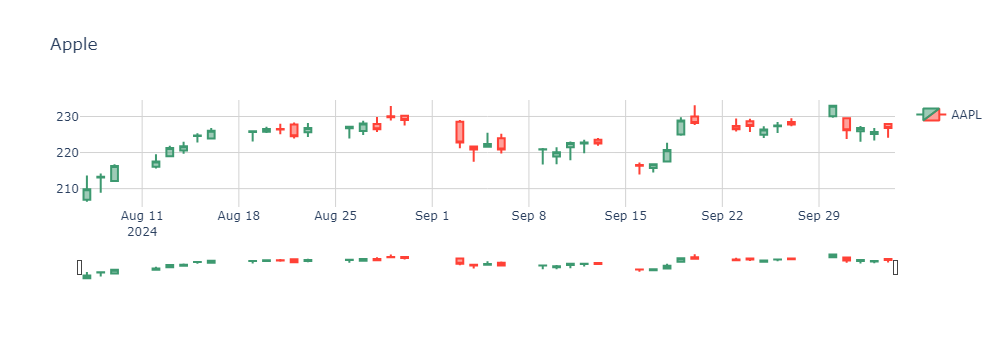

In [87]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

grafico = graph_objects.Figure(
    data=[graph],
    layout_title='Apple',
    layout=layout
)

grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico